# Project Name : Stores Sales Prediction.
# Technologies : Machine Learning (Advanced Regression).
# Domain : Sales & Marketing.

# Problem Statement:

Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

# Dataset:

Dataset link: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

We have train (8523) and test (5681) data set, train data set has both input and output
variable(s). We need to predict the sales for test data set.

# Lifecycle of Data Science Project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns',None)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
train = pd.read_csv("Train.csv")

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# In Data Analysis we will analyze to find the below stuff:

1. Missing Values.
2. All the numerical variables.
3. Distribution of the numerical variables.
4. Categorical variables.
5. Outliers.
6. Relationship between independent and dependent features.

In [9]:
#Checking column names and number of columns
print("Column names :",train.columns)
print("Number of columns : ", len(train.columns))

Column names : Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Number of columns :  12


In [10]:
#Checking Shape of Column
train.shape

(8523, 12)

In [11]:
# Checking Statistics 
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
# Checking wheter there are any Na values in the train dataset.
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Exploring Data Types with respect to columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Here we have two features with na values:
1. Item_Weight.
   Number of na values : 1463 .
   DataType = Float.

2. Outlet_Size .
   Number of na values : 2410 .
   DataType = Object.

In [14]:
# There are no duplicate values in the dataset.

print("Number of duplicated values in train dataset is",train.duplicated().sum()) 

Number of duplicated values in train dataset is 0


# Checking numerical features in the train dataset.

In [15]:
numerical_feature = [feature for feature in train.columns if train[feature].dtypes != 'O']

In [16]:
# There are 5 numerical features in the train dataset

print("Number of numerical features are :",len(numerical_feature ))

Number of numerical features are : 5


In [17]:
# Finding temporal features in numerical features.
temporal_values=[feature for feature in numerical_feature if 'Year' in feature]

In [18]:
for feature in temporal_values:
    print("Unique valiues in",feature, train[feature].unique())

Unique valiues in Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

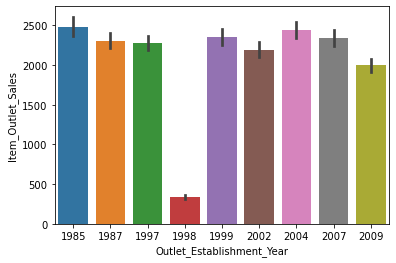

In [19]:
# Checking if there is any relation between year and sales.

sns.barplot(x = 'Outlet_Establishment_Year', y="Item_Outlet_Sales", data=train)

# Observation
1. In the year 1998 item sales is the least.
2. The item sales is most in the year 1985.

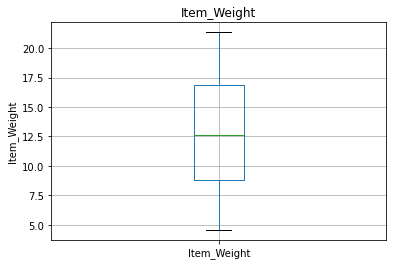

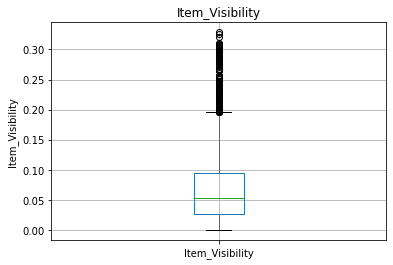

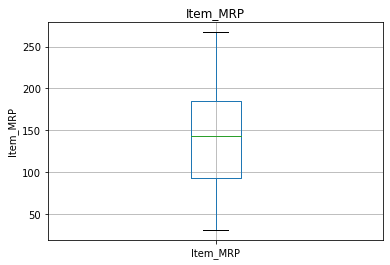

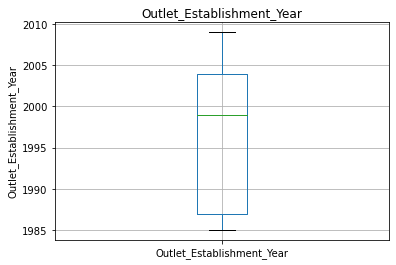

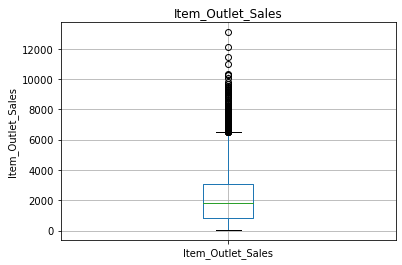

In [20]:
# Lets check if there are any outliers in numerical feature.

for feature in numerical_feature:
    train.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Observation

There are clearly outliers in: 
1. Item_Visibility(Independent feature)
2. Item_Outlet_Sales(Target feature)

In [21]:
# Visualizing Item_Visibility and Item_Outlet_Sales

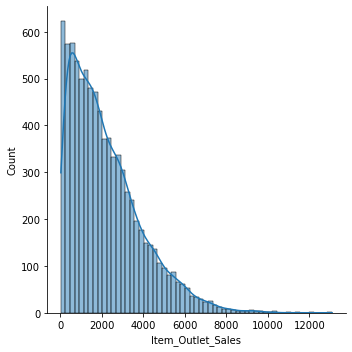

In [22]:
sns.displot(train['Item_Outlet_Sales'], kde = True)

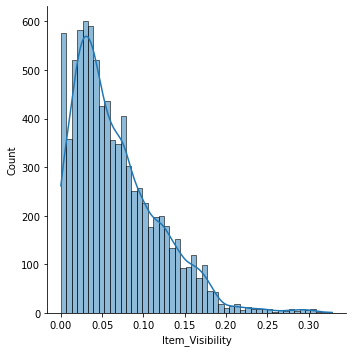

In [23]:
sns.displot(train['Item_Visibility'], kde = True)

# Observation 

Item_Visibility and Item_Outlet_Sales are log normally distributed 

# Checking categorical features in the train dataset.

In [24]:
categorical_feature = [feature for feature in train.columns if train[feature].dtypes =='O']

In [25]:
print(f"Name of Categorical Features:{categorical_feature} \n\n\
Number of Categorical Features : {len(categorical_feature)}")

Name of Categorical Features:['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] 

Number of Categorical Features : 7


In [26]:
#Checking the number of categories in each categorical feature
for feature in categorical_feature:
    print("The feature name is {} and the number of categories are {}".format(feature,len(train[feature].unique())))

The feature name is Item_Identifier and the number of categories are 1559
The feature name is Item_Fat_Content and the number of categories are 5
The feature name is Item_Type and the number of categories are 16
The feature name is Outlet_Identifier and the number of categories are 10
The feature name is Outlet_Size and the number of categories are 4
The feature name is Outlet_Location_Type and the number of categories are 3
The feature name is Outlet_Type and the number of categories are 4


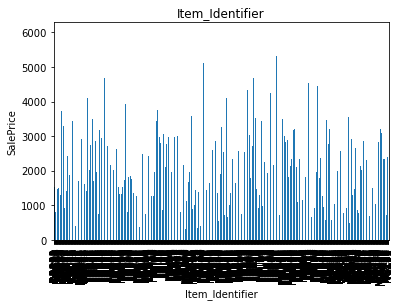

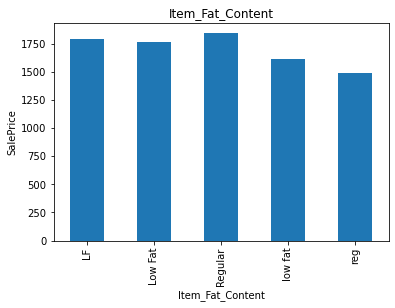

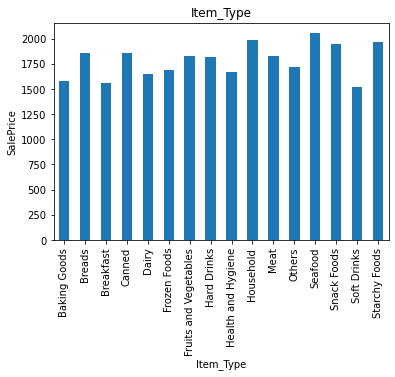

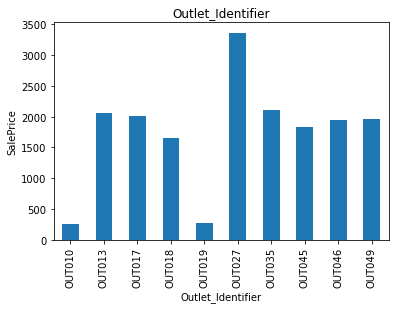

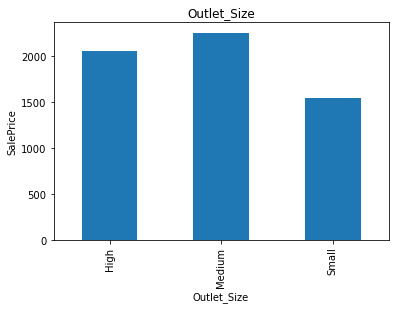

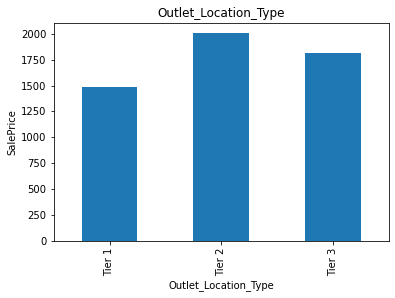

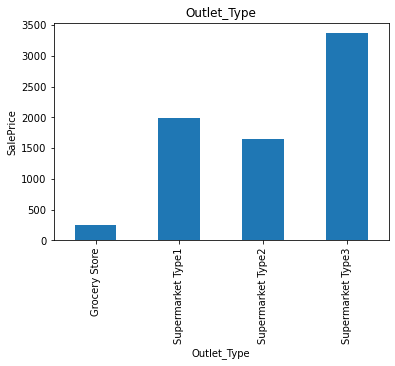

In [27]:
## find the relationship between categorical feature and sales price

data = train.copy()
for feature in categorical_feature:
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

# From this we can conclude that :
1. SuperMarket Type 3 gives the highest number of sales.
2. Tier-2 location has the highest number of Sales and Tier-1 location has lowest number of sales.
3. Medium sized outlet gives the highest number of sales and small sized outlet gives lowest number of sales.
4. Outlet 027 has the highest number of sales.
5. Food Items (Starchy foods and Seafood) gives highest number of sales.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


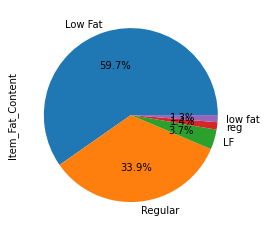

In [28]:
# Analyzing and Feature Engineering on Item_Fat_Content feature
train['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(train['Item_Fat_Content'].value_counts())

In [29]:
## Replacing low fat ,LF with Low Fat and reg with Regular.

train.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [30]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


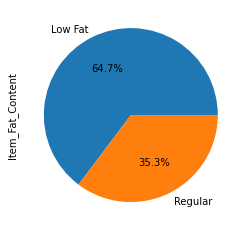

In [31]:
train['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(train['Item_Fat_Content'].value_counts())

# Observation

We can see that we have more items from low fat category rather than regular.

# FEATURE ENGINEERING

# Handling the Nan values in Outlet_size feature (Categorical)

As it is a Categorical Feature using Mode imputation

In [32]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [33]:
print("Most frequent element in Outlet_size(Mode):",train['Outlet_Size'].mode()[0])

Most frequent element in Outlet_size(Mode): Medium


In [34]:
# Imputing Na values with 'Medium'
train['Outlet_Size'].fillna('Medium', inplace= True)

# Handling NaN values in Item_Weight feature (Numerical)

As it is a Numerical Feature using Mean imputation

In [35]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [36]:
train['Item_Weight'].isna().sum()

1463

<AxesSubplot:xlabel='Item_Weight'>

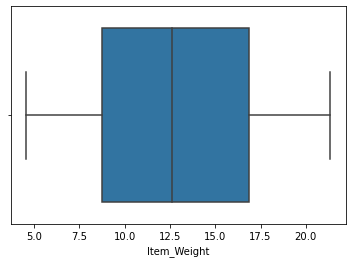

In [37]:
#There are no outliers so we will use mean to replace NaN values.

sns.boxplot(train['Item_Weight'])

In [38]:
print('Mean value is :',train['Item_Weight'].mean())

Mean value is : 12.857645184136183


In [39]:
train['Item_Weight'].fillna('12.85', inplace= True)

In [40]:
train['Item_Weight'].isna().sum()

0

In [41]:
# There are no Na values in the train Dataset
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Changing Data Type Of Item Weight

In [42]:
train['Item_Weight'] = train['Item_Weight'].astype(dtype = float)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


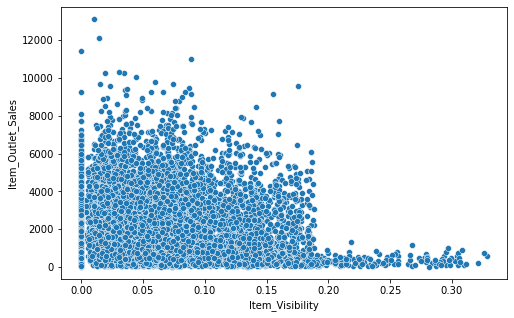

In [44]:
# Lets analize Item_visibility feature
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

In [45]:
train.Item_Visibility.min()

0.0

# Observation

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

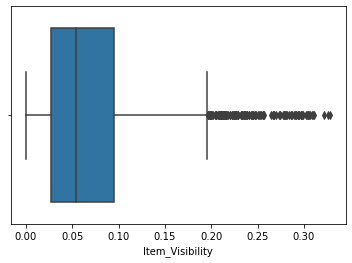

In [46]:
sns.boxplot(x="Item_Visibility", data=train)
plt.show()

In [47]:
# As we can see there are lot of outliers so we can impute the values which are 0 with median.

train['Item_Visibility'].median()

0.053930934

In [48]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].median())

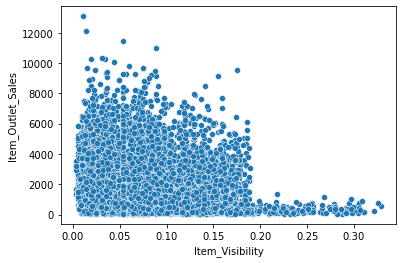

In [49]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

In [50]:
train.Item_Visibility.min()

0.003574698

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers

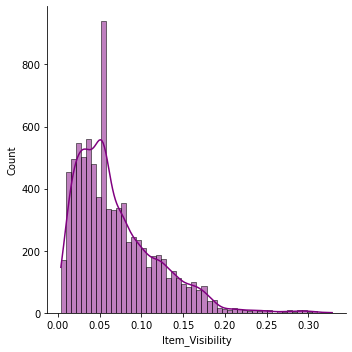

In [51]:
sns.displot(x=train.Item_Visibility, color='purple', kde=True)
plt.show()

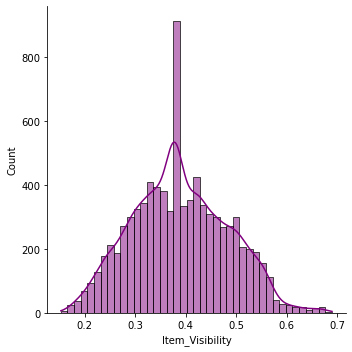

In [52]:
# Removing Skewness using cube root

sns.displot(x=np.cbrt(train.Item_Visibility), color='purple', kde=True)
plt.show()

In [53]:
train['Item_Visibility'] = np.cbrt(train['Item_Visibility'])

Removing Skewness from the target feature  (Item_Outlet_Sales)

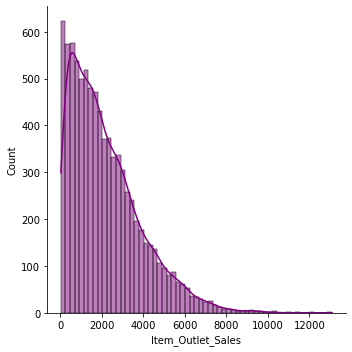

In [54]:
sns.displot((train.Item_Outlet_Sales), color='purple', kde=True)

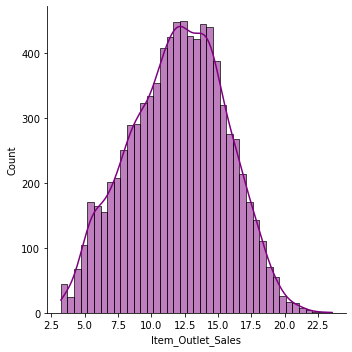

In [55]:
# Using Cube root for removing skewness
sns.displot(x=np.cbrt(train.Item_Outlet_Sales), color='purple', kde=True)
plt.show()

In [56]:
train['Item_Outlet_Sales'] = np.cbrt(train['Item_Outlet_Sales'])

For Item_MRP feature

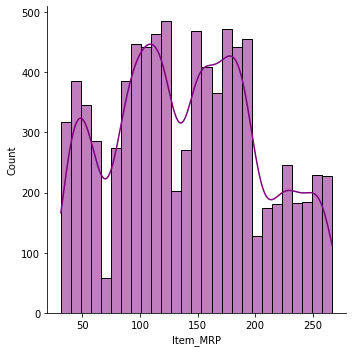

In [57]:
sns.displot(train['Item_MRP'], kde =True, color='purple')

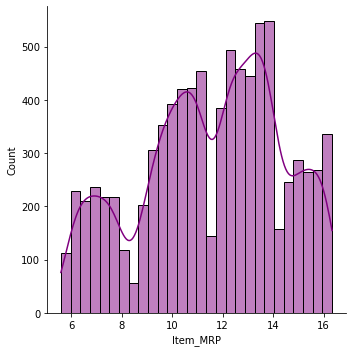

In [58]:
#Using square root
sns.displot(x = np.sqrt(train['Item_MRP']), kde =True, color='purple')

In [59]:
train['Item_MRP'] = np.sqrt(train['Item_MRP'])

For Item_Weight feature

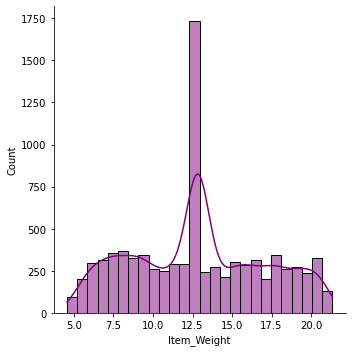

In [60]:
sns.displot((train['Item_Weight']), kde =True, color='purple')

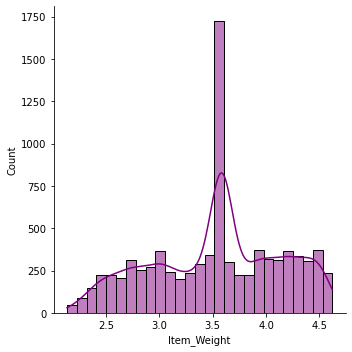

In [61]:
#Using square root
sns.displot(x = np.sqrt(train['Item_Weight']), kde =True, color='purple')

In [62]:
train['Item_Weight'] = np.sqrt(train['Item_Weight'])

# Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoding = LabelEncoder()
train['Item_Identifier']= label_encoding.fit_transform(train['Item_Identifier'])

In [65]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,3.049590,Low Fat,0.252232,Dairy,15.805354,OUT049,1999,Medium,Tier 1,Supermarket Type1,15.515611
1,8,2.433105,Regular,0.268136,Soft Drinks,6.947604,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.625576
2,662,4.183300,Low Fat,0.255913,Meat,11.900336,OUT049,1999,Medium,Tier 1,Supermarket Type1,12.800240
3,1121,4.381780,Regular,0.377815,Fruits and Vegetables,13.494258,OUT010,1998,Medium,Tier 3,Grocery Store,9.013888
4,1297,2.988311,Low Fat,0.377815,Household,7.339033,OUT013,1987,High,Tier 3,Supermarket Type1,9.982319


In [66]:
train['Item_Type'] = label_encoding.fit_transform(train['Item_Type'])

In [67]:
train['Outlet_Identifier'] = label_encoding.fit_transform(train['Outlet_Identifier'])

In [68]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,3.049590,Low Fat,0.252232,4,15.805354,9,1999,Medium,Tier 1,Supermarket Type1,15.515611
1,8,2.433105,Regular,0.268136,14,6.947604,3,2009,Medium,Tier 3,Supermarket Type2,7.625576
2,662,4.183300,Low Fat,0.255913,10,11.900336,9,1999,Medium,Tier 1,Supermarket Type1,12.800240
3,1121,4.381780,Regular,0.377815,6,13.494258,0,1998,Medium,Tier 3,Grocery Store,9.013888
4,1297,2.988311,Low Fat,0.377815,9,7.339033,1,1987,High,Tier 3,Supermarket Type1,9.982319


# One Hot Encoding

In [69]:
train = pd.get_dummies(train, columns= ['Outlet_Type'], drop_first= True)

In [70]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,3.049590,Low Fat,0.252232,4,15.805354,9,1999,Medium,Tier 1,15.515611,1,0,0
1,8,2.433105,Regular,0.268136,14,6.947604,3,2009,Medium,Tier 3,7.625576,0,1,0
2,662,4.183300,Low Fat,0.255913,10,11.900336,9,1999,Medium,Tier 1,12.800240,1,0,0
3,1121,4.381780,Regular,0.377815,6,13.494258,0,1998,Medium,Tier 3,9.013888,0,0,0
4,1297,2.988311,Low Fat,0.377815,9,7.339033,1,1987,High,Tier 3,9.982319,1,0,0


# Using Map function

In [71]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,3.049590,Low Fat,0.252232,4,15.805354,9,1999,Medium,Tier 1,15.515611,1,0,0
1,8,2.433105,Regular,0.268136,14,6.947604,3,2009,Medium,Tier 3,7.625576,0,1,0


For Item_Fat_Content feature

In [72]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [73]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat': 0, 'Regular':1})

For Outlet_Size feature

In [74]:
train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [75]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

For Outlet_Location_Type feature

In [76]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [77]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})

In [78]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,3.049590,0,0.252232,4,15.805354,9,1999,1,0,15.515611,1,0,0
1,8,2.433105,1,0.268136,14,6.947604,3,2009,1,2,7.625576,0,1,0
2,662,4.183300,0,0.255913,10,11.900336,9,1999,1,0,12.800240,1,0,0
3,1121,4.381780,1,0.377815,6,13.494258,0,1998,1,2,9.013888,0,0,0
4,1297,2.988311,0,0.377815,9,7.339033,1,1987,2,2,9.982319,1,0,0


# Finding Correlation

In [79]:
corr = train.corr()

<AxesSubplot:>

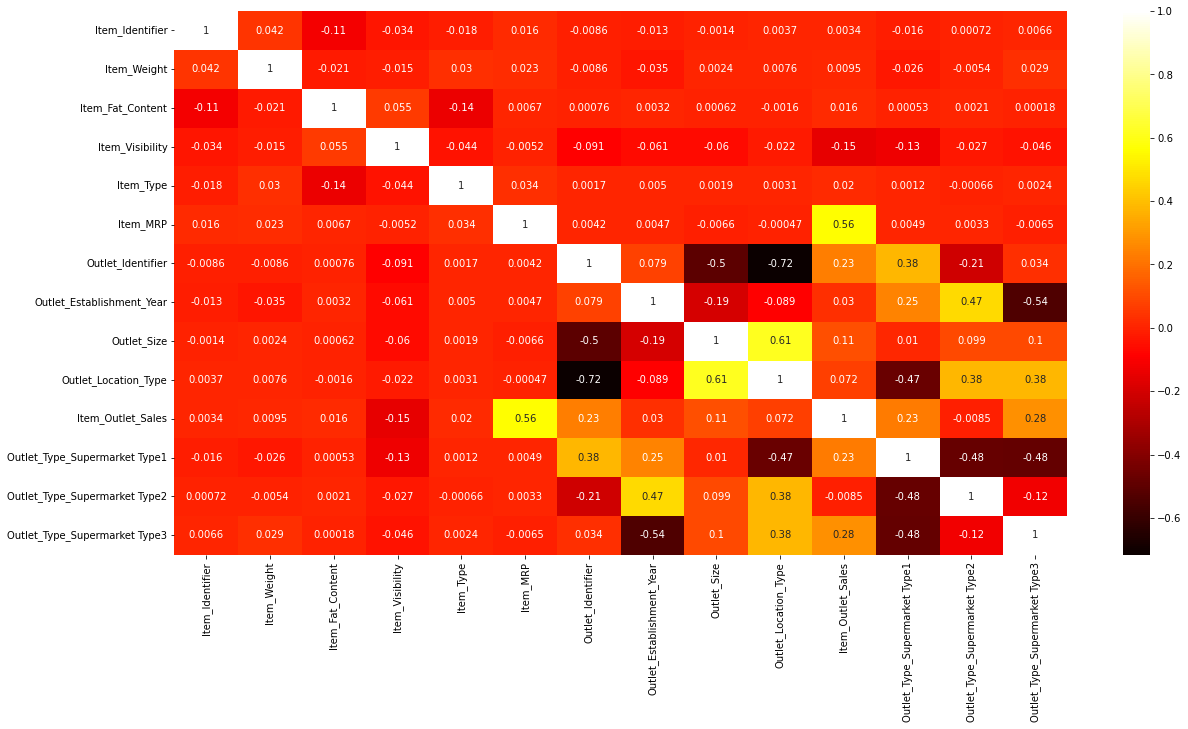

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot= True, cmap = 'hot')

# Dropping Features which are not required.

In [81]:
train.drop(axis = 1, columns = 'Item_Identifier',inplace= True)

In [82]:
train.drop(axis = 1, columns = 'Outlet_Establishment_Year',inplace= True)

In [83]:
train.drop(axis = 1, columns = 'Outlet_Identifier',inplace= True)

In [84]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,3.049590,0,0.252232,4,15.805354,1,0,15.515611,1,0,0
1,2.433105,1,0.268136,14,6.947604,1,2,7.625576,0,1,0
2,4.183300,0,0.255913,10,11.900336,1,0,12.800240,1,0,0
3,4.381780,1,0.377815,6,13.494258,1,2,9.013888,0,0,0
4,2.988311,0,0.377815,9,7.339033,2,2,9.982319,1,0,0


# Splitting Independent and Dependent features

In [86]:
x =  train.loc[:, train.columns != 'Item_Outlet_Sales']
y = train['Item_Outlet_Sales']

In [87]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,3.049590,0,0.252232,4,15.805354,1,0,1,0,0
1,2.433105,1,0.268136,14,6.947604,1,2,0,1,0
2,4.183300,0,0.255913,10,11.900336,1,0,1,0,0
3,4.381780,1,0.377815,6,13.494258,1,2,0,0,0
4,2.988311,0,0.377815,9,7.339033,2,2,1,0,0


In [82]:
y

0       15.515611
1        7.625576
2       12.800240
3        9.013888
4        9.982319
          ...    
8518    14.058233
8519     8.189661
8520    10.606219
8521    12.266265
8522     9.148444
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc =StandardScaler()

In [85]:
x_std = sc.fit_transform(x)

In [86]:
x_std

array([[-0.79904316, -0.73814723, -1.44657253, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.81603177,  1.35474328, -1.27839844, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.07118877, -0.73814723, -1.4076537 , ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.45892693, -0.73814723, -0.64870245, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.40025353,  1.35474328,  1.44436884, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.51653583, -0.73814723, -0.35597962, ...,  0.72680189,
        -0.34955064, -0.35102831]])

# Train Test Split to check how model is performing

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state= 42)

In [88]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,2.778489,1,0.528843,6,10.800306,1,2,0,0,0
655,4.444097,0,0.242731,9,10.150527,0,0,1,0,0
2229,3.584690,1,0.378490,1,11.363582,1,2,0,0,1
2537,4.398863,0,0.490961,13,14.920080,1,1,1,0,0
3528,4.283690,1,0.451681,5,13.595095,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5734,3.065126,1,0.659118,6,11.797618,1,2,0,0,0
5191,3.949684,0,0.489897,5,8.698678,1,1,1,0,0
5390,4.195235,0,0.266576,8,15.406460,1,1,1,0,0
860,4.511097,0,0.378821,13,10.860322,1,1,1,0,0


In [89]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,3.781534,0,0.297384,5,8.912362,2,2,1,0,0
2957,2.816026,0,0.414346,8,6.535182,0,0,1,0,0
7031,3.807887,1,0.345698,3,6.484242,1,0,1,0,0
1084,3.584690,1,0.355074,14,13.179734,1,2,0,0,1
856,3.192961,1,0.231805,10,14.053861,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
443,3.514257,0,0.547589,9,10.977814,1,0,1,0,0
777,2.336664,1,0.318046,3,13.594999,0,1,1,0,0
1119,4.283690,0,0.530073,9,13.854617,1,2,0,0,0
3209,3.162278,1,0.336132,13,11.344576,1,1,1,0,0


# For Test Dataset

In [90]:
test = pd.read_csv('Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [91]:
print("Length of columns is : ",len(test.columns))
print("Columns name are: ",test.columns)

Length of columns is :  11
Columns name are:  Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [92]:
## Checking null values

test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# There are 2 features with null vales:
1. Item Weight (976)
2. Outlet Size (1606)

In [93]:
# For Item Weight which is numerical feature using Mean imputation.
test.Item_Weight.mean()

12.695633368756374

In [94]:
test['Item_Weight'].fillna('12.695',inplace = True)

In [95]:
# For Outlet Size which is categorical feature using Mode

test.Outlet_Size.mode()[0]

'Medium'

In [96]:
test['Outlet_Size'].fillna('Medium', inplace = True)

In [97]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Droping Features

In [98]:
test.drop(axis = 1, columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'], inplace = True)

In [99]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.3,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1
2,14.6,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1
4,12.695,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3


# Replacing values in Item fat content feature

In [100]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [101]:
## Replacing low fat ,LF with Low Fat and reg with Regular.

test.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [102]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Using Map Function

In [103]:
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})

In [104]:
test['Outlet_Size'] = test['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})

In [105]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})

In [106]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,0,0.007565,Snack Foods,107.8622,1,0,Supermarket Type1
1,8.3,1,0.038428,Dairy,87.3198,1,1,Supermarket Type1
2,14.6,0,0.099575,Others,241.7538,1,2,Grocery Store
3,7.315,0,0.015388,Snack Foods,155.0340,1,1,Supermarket Type1
4,12.695,1,0.118599,Dairy,234.2300,1,2,Supermarket Type3


# Label Encoding

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
label_encoding = LabelEncoder()
test['Item_Type']= label_encoding.fit_transform(test['Item_Type'])

In [109]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,0,0.007565,13,107.8622,1,0,Supermarket Type1
1,8.3,1,0.038428,4,87.3198,1,1,Supermarket Type1
2,14.6,0,0.099575,11,241.7538,1,2,Grocery Store
3,7.315,0,0.015388,13,155.0340,1,1,Supermarket Type1
4,12.695,1,0.118599,4,234.2300,1,2,Supermarket Type3


# One Hot Encoding

In [110]:
test = pd.get_dummies(test, columns= ['Outlet_Type'], drop_first= True)

In [111]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.75,0,0.007565,13,107.8622,1,0,1,0,0
1,8.3,1,0.038428,4,87.3198,1,1,1,0,0
2,14.6,0,0.099575,11,241.7538,1,2,0,0,0
3,7.315,0,0.015388,13,155.0340,1,1,1,0,0
4,12.695,1,0.118599,4,234.2300,1,2,0,0,1


# Changing DataTypes

In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    5681 non-null   object 
 1   Item_Fat_Content               5681 non-null   int64  
 2   Item_Visibility                5681 non-null   float64
 3   Item_Type                      5681 non-null   int32  
 4   Item_MRP                       5681 non-null   float64
 5   Outlet_Size                    5681 non-null   int64  
 6   Outlet_Location_Type           5681 non-null   int64  
 7   Outlet_Type_Supermarket Type1  5681 non-null   uint8  
 8   Outlet_Type_Supermarket Type2  5681 non-null   uint8  
 9   Outlet_Type_Supermarket Type3  5681 non-null   uint8  
dtypes: float64(2), int32(1), int64(3), object(1), uint8(3)
memory usage: 305.3+ KB


In [113]:
test['Item_Weight'] = test['Item_Weight'].astype(dtype = float)

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    5681 non-null   float64
 1   Item_Fat_Content               5681 non-null   int64  
 2   Item_Visibility                5681 non-null   float64
 3   Item_Type                      5681 non-null   int32  
 4   Item_MRP                       5681 non-null   float64
 5   Outlet_Size                    5681 non-null   int64  
 6   Outlet_Location_Type           5681 non-null   int64  
 7   Outlet_Type_Supermarket Type1  5681 non-null   uint8  
 8   Outlet_Type_Supermarket Type2  5681 non-null   uint8  
 9   Outlet_Type_Supermarket Type3  5681 non-null   uint8  
dtypes: float64(3), int32(1), int64(3), uint8(3)
memory usage: 305.3 KB


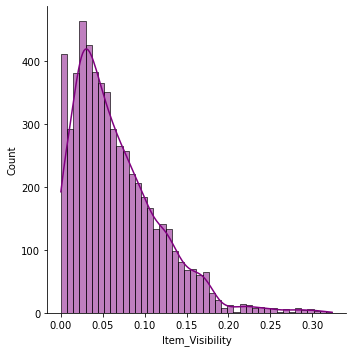

In [115]:
sns.displot(test['Item_Visibility'],color='purple', kde = True)

<AxesSubplot:xlabel='Item_Visibility'>

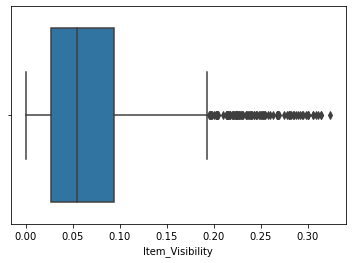

In [116]:
sns.boxplot(test['Item_Visibility'])

In [117]:
# As we can see there are lot of outliers so we can impute the values which are 0 with median.

test['Item_Visibility'].median()

0.054154252

In [118]:
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].median())

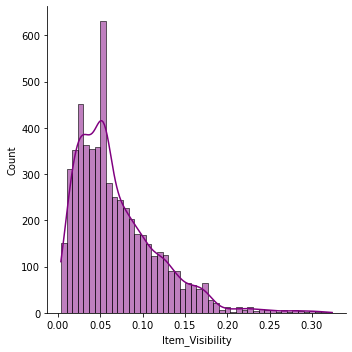

In [119]:
sns.displot(test['Item_Visibility'],color='purple', kde = True)

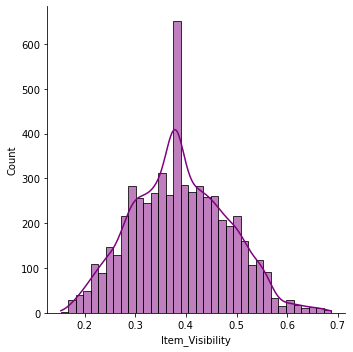

In [120]:
# Removing Skewness

sns.displot(x=np.cbrt(test.Item_Visibility), color='purple', kde=True)
plt.show()

In [121]:
test['Item_Visibility'] = np.cbrt(test['Item_Visibility'])
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0,0.196306,13,107.8622,1,0,1,0,0
1,8.300,1,0.337454,4,87.3198,1,1,1,0,0
2,14.600,0,0.463500,11,241.7538,1,2,0,0,0
3,7.315,0,0.248732,13,155.0340,1,1,1,0,0
4,12.695,1,0.491316,4,234.2300,1,2,0,0,1


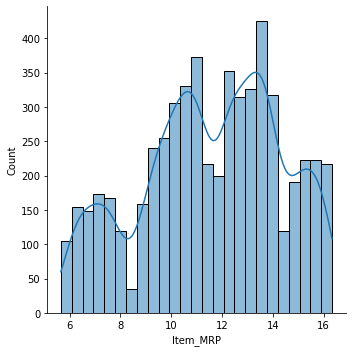

In [122]:
sns.displot(x = np.sqrt(test['Item_MRP']), kde =True)

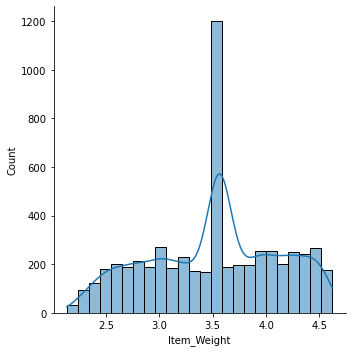

In [123]:
sns.displot(x = np.sqrt(test['Item_Weight']), kde =True)

In [124]:
test['Item_MRP'] = np.sqrt(test['Item_MRP'])

In [125]:
test['Item_Weight'] = np.sqrt(test['Item_Weight'])

In [126]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,4.555217,0,0.196306,13,10.385673,1,0,1,0,0
1,2.880972,1,0.337454,4,9.344506,1,1,1,0,0
2,3.820995,0,0.463500,11,15.548434,1,2,0,0,0
3,2.704626,0,0.248732,13,12.451265,1,1,1,0,0
4,3.563004,1,0.491316,4,15.304574,1,2,0,0,1


In [127]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,3.049590,0,0.252232,4,15.805354,1,0,15.515611,1,0,0
1,2.433105,1,0.268136,14,6.947604,1,2,7.625576,0,1,0


# Rearranging columns according to train dataset

In [128]:
cols = ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
     'Outlet_Size','Outlet_Location_Type','Outlet_Type',"Outlet_Type_Supermarket Type1",
        "Outlet_Type_Supermarket Type2","Outlet_Type_Supermarket Type3"]

In [129]:
#test = test.reindex(columns= cols)

In [130]:
test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,4.555217,0,0.196306,13,10.385673,1,0,1,0,0
1,2.880972,1,0.337454,4,9.344506,1,1,1,0,0


In [131]:
z = test

# For prediction test dataset using z 

In [132]:
z.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,4.555217,0,0.196306,13,10.385673,1,0,1,0,0
1,2.880972,1,0.337454,4,9.344506,1,1,1,0,0
2,3.820995,0,0.463500,11,15.548434,1,2,0,0,0
3,2.704626,0,0.248732,13,12.451265,1,1,1,0,0
4,3.563004,1,0.491316,4,15.304574,1,2,0,0,1


# Model Training

# Decision Tree

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

In [134]:
d_tree = DecisionTreeRegressor()

In [135]:
param = {'criterion':['squared_error'],
         'max_depth':[4,5,6,7,]}

In [136]:
d_regressor = GridSearchCV(d_tree, param_grid= param, cv = 10)

In [137]:
d_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [4, 5, 6, 7]})

In [138]:
print("Best paramaters : ",d_regressor.best_params_)
print("Best Score : ",d_regressor.score(x_train,y_train)*100)

Best paramaters :  {'criterion': 'squared_error', 'max_depth': 6}
Best Score :  71.1078562134492


In [139]:
train_pred_dt = d_regressor.predict(x_train)

In [140]:
print("MAE :",mean_absolute_error(y_train, train_pred_dt))
print("MSE :", mean_squared_error(y_train, train_pred_dt))
print("R2 Score :",r2_score(y_train, train_pred_dt)*100,"%")

MAE : 1.491552197559204
MSE : 3.7005232498987426
R2 Score : 71.1078562134492 %


In [141]:
test_pred_dt = d_regressor.predict(x_test)

In [142]:
print("MAE :",mean_absolute_error(y_test, test_pred_dt))
print("MSE :", mean_squared_error(y_test, test_pred_dt))
print("R2 Score :",r2_score(y_test, test_pred_dt)*100,"%")

MAE : 1.5232386544130854
MSE : 3.893367846238875
R2 Score : 69.71651242329624 %


# Predicting test dataset i.e (z) using Decision Tree Regressor

In [143]:
z_dataset_dt = d_regressor.predict(z)

In [144]:
z_dataset_dt

array([11.63152036, 10.64767004,  8.08961447, ..., 12.21366478,
       14.5455677 , 10.64767004])

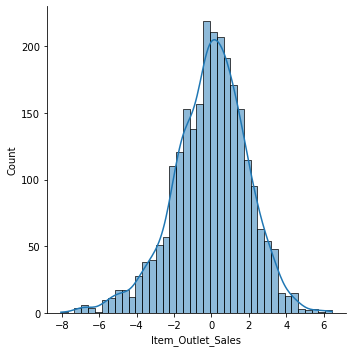

In [145]:
sns.displot(y_test-test_pred_dt, kde = True)

# Random Forest

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
rand = RandomForestRegressor()

In [148]:
param_rf = {'max_depth':[4,5,6,7],
           'n_estimators':[50,55,60,65]}

In [149]:
rand_regressor = GridSearchCV(rand, param_rf, cv = 10)

In [150]:
rand_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'n_estimators': [50, 55, 60, 65]})

In [151]:
print("Best Parameters :", rand_regressor.best_params_)

Best Parameters : {'max_depth': 5, 'n_estimators': 50}


In [152]:
train_pred_rf= rand_regressor.predict(x_train)

In [153]:
print("MAE :",mean_absolute_error(y_train, train_pred_rf))
print("MSE :", mean_squared_error(y_train, train_pred_rf))
print("R2 Score :",r2_score(y_train, train_pred_rf)*100,"%")

MAE : 1.5057785019010403
MSE : 3.7605717734725457
R2 Score : 70.63902235939577 %


In [154]:
test_pred_rf= rand_regressor.predict(x_test)

In [155]:
print("MAE :",mean_absolute_error(y_test, test_pred_rf))
print("MSE :", mean_squared_error(y_test, test_pred_rf))
print("R2 Score :",r2_score(y_test, test_pred_rf)*100,"%")

MAE : 1.506257960306175
MSE : 3.7987863497033625
R2 Score : 70.45218849821072 %


# Predicting test dataset i.e (z) using Random Forest Regressor

In [156]:
z_dataset_rf = rand_regressor.predict(z)

In [157]:
z_dataset_rf

array([11.72039764, 10.87512945,  7.904771  , ..., 12.29974787,
       14.71244333, 10.87512945])

# XGBoost

In [158]:
from xgboost import XGBRegressor

In [159]:
para = {'max_depth':[1,2,3],
       'n_estimators':[70,75,80,85],
       'min_child_weight':[52,53,54,55,56],
       }

In [160]:
xg = XGBRegressor()

In [161]:
xg_reg = GridSearchCV(xg, para, cv = 10)

In [162]:
xg_reg.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
      

In [163]:
print("Best parameters :",xg_reg.best_params_)
print("Best Score :",xg_reg.best_score_)

Best parameters : {'max_depth': 2, 'min_child_weight': 53, 'n_estimators': 70}
Best Score : 0.6895138521983081


In [164]:
train_pred_xg = xg_reg.predict(x_train)

In [165]:
train_pred_xg

array([ 6.3628035, 11.766824 , 14.861499 , ..., 15.866831 , 11.703247 ,
       11.28549  ], dtype=float32)

In [166]:
print("MAE :",mean_absolute_error(y_train, train_pred_xg))
print("MSE :", mean_squared_error(y_train, train_pred_xg))
print("R2 Score :",r2_score(y_train, train_pred_xg)*100,"%")

MAE : 1.5069622334697792
MSE : 3.746550862593061
R2 Score : 70.74849179001197 %


In [167]:
test_pred_xg = xg_reg.predict(x_test)

In [168]:
test_pred_xg

array([10.599543 ,  8.796743 ,  8.646805 , ...,  7.6558375, 12.557557 ,
       15.826427 ], dtype=float32)

In [169]:
print("MAE :",mean_absolute_error(y_test, test_pred_xg))
print("MSE :", mean_squared_error(y_test, test_pred_xg))
print("R2 Score :",r2_score(y_test, test_pred_xg)*100,"%")

MAE : 1.526051819522645
MSE : 3.869147115868016
R2 Score : 69.90490669176825 %


# Predicting test dataset i.e (z) using XGBoost Regressor

In [170]:
z_dataset_xg = xg_reg.predict(z)

In [171]:
z_dataset_xg

array([11.719376, 11.075162,  8.452475, ..., 11.885407, 14.879228,
       10.592132], dtype=float32)

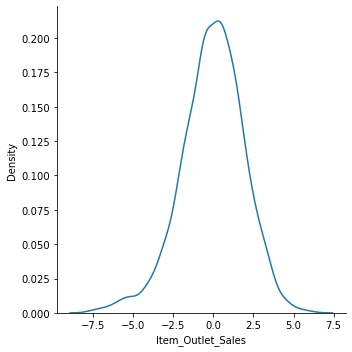

In [172]:
sns.displot(y_test-test_pred_xg, kind='kde')

# Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [196]:
lr = LinearRegression()

In [197]:
mse = cross_val_score(lr, x_std,y, scoring='neg_mean_squared_error', cv =5)

In [198]:
lr.fit(x_std,y)

LinearRegression()

In [199]:
lr.score(x_std,y)*100

69.26772758005862

In [200]:
predict_lr_train = lr.predict(x_std)
r2_score(y,predict_lr_train)

0.6926772758005861

In [201]:
print("MAE :",mean_absolute_error(y, predict_lr_train))
print("MSE :", mean_squared_error(y, predict_lr_train))
print("R2 Score :",r2_score(y, predict_lr_train)*100,"%")

MAE : 1.554084487401334
MSE : 3.94256672403309
R2 Score : 69.26772758005862 %


# Ridge Regression

In [202]:
from sklearn.linear_model import Ridge

In [203]:
ridge = Ridge()

In [204]:
parameters = {'alpha':[1e-10,2,5,8,20,30,40,50,60,70,80,90,100]}

In [205]:
ridge_regressor = GridSearchCV(ridge, parameters, cv = 10)

In [206]:
ridge_regressor.fit(x_std,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 2, 5, 8, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100]})

In [207]:
predict_ridge_train = ridge_regressor.predict(x_std)

In [208]:
print("MAE :",mean_absolute_error(y, predict_ridge_train))
print("MSE :", mean_squared_error(y, predict_ridge_train))
print("R2 Score :",r2_score(y, predict_ridge_train)*100,"%")

MAE : 1.5540673985799496
MSE : 3.942571122049099
R2 Score : 69.26769329756308 %


In [209]:
predict_ridge_test = ridge_regressor.predict(z)

In [210]:
predict_ridge_test

array([35.56368549, 33.54100766, 43.06917934, ..., 36.60392454,
       44.16452098, 32.715147  ])

# Lasso

In [211]:
from sklearn.linear_model import Lasso

In [212]:
lasso = Lasso()

In [213]:
parameters = {'alpha':[1e-10,2,5,8,20,30,40,50,60,70,80,90,100]}

In [214]:
lasso_regressor = GridSearchCV(lasso, parameters, cv = 10)

In [215]:
lasso_regressor.fit(x,y)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 2, 5, 8, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100]})

In [216]:
predict_lasso_train = lasso_regressor.predict(x)

In [217]:
print("MAE :",mean_absolute_error(y, predict_lasso_train))
print("MSE :", mean_squared_error(y, predict_lasso_train))
print("R2 Score :",r2_score(y, predict_lasso_train)*100,"%")

MAE : 1.5540844873950312
MSE : 3.94256672403309
R2 Score : 69.26772758005862 %


In [218]:
prediction_lasso_test = lasso_regressor.predict(z)

In [219]:
prediction_lasso_test

array([11.70012024, 11.03181091,  9.42101164, ..., 12.05898931,
       14.86068702, 10.7143939 ])

# Observation

The Model is Performing best with Random Forest Regressor

1.  MAE : 1.5058124973962799
2.  MSE : 3.7602919882553074
3.  R2 Score : 70.64120680580507 %

# Creating pickle file.

In [220]:
import pickle

In [221]:
pickle.dump(rand_regressor, open('model.pkl', 'wb'))

In [222]:
pickle_prediction = pickle.load(open('model.pkl', 'rb'))

In [223]:
pickle_prediction.predict(z)

array([11.69090872, 10.84900752,  7.91724037, ..., 12.15214139,
       14.71743549, 10.79768774])

In [224]:
## Batch Inputs

In [226]:
train.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,3.04959,0,0.252232,4,15.805354,1,0,15.515611,1,0,0


In [232]:
data={'Item_Weight':3.04959,'Item Fat Content':0,'Item_Visibility':0.252232,
           'Item_Type':4,'Item_MRP':15.805354,'Outlet_Location_Type':0,'Outlet_Size':1,
           'Outlet_Type_Supermarket Type1':1,'Outlet_Type_Supermarket Type2':0,
           'Outlet_Type_Supermarket Type3':0}

In [233]:
[list(data.values())]

[[3.04959, 0, 0.252232, 4, 15.805354, 0, 1, 1, 0, 0]]

In [234]:
pickle_prediction.predict([list(data.values())])[0]

15.621048006517801

In [147]:
x.Item_Type.unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [5]:
df = pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [88]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,3.049590,0,0.252232,4,15.805354,1,0,15.515611,1,0,0
1,2.433105,1,0.268136,14,6.947604,1,2,7.625576,0,1,0
2,4.183300,0,0.255913,10,11.900336,1,0,12.800240,1,0,0
3,4.381780,1,0.377815,6,13.494258,1,2,9.013888,0,0,0
4,2.988311,0,0.377815,9,7.339033,2,2,9.982319,1,0,0


In [91]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [89]:
train.Item_Type.unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [164]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)